In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
sns.set_style('darkgrid')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Sobrevivientes')

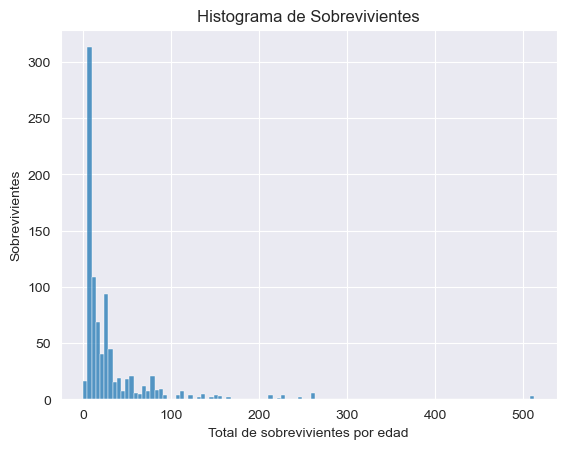

In [5]:
g = sns.histplot(data= titanic, x = 'fare')
# add label
g.set_title('Histograma de Sobrevivientes')
g.set_xlabel('Total de sobrevivientes por edad')
g.set_ylabel('Sobrevivientes')

Text(0.5, 0, 'Total de sobrevientes por edad')

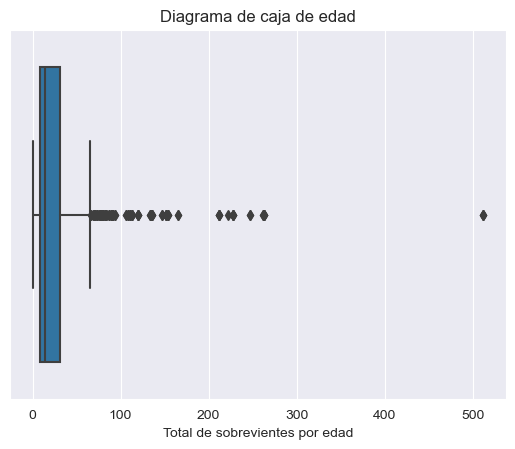

In [6]:
# diagrama de caja
t = sns.boxplot(data= titanic, x= 'fare')

# Agregar titulo y cambiar el label x
t.set_title('Diagrama de caja de edad')
t.set_xlabel('Total de sobrevientes por edad')

In [7]:
# Z-escore
from scipy.stats import zscore
# calculate z-core for eaaach data point and commpute its absolute value
z_scores = zscore(titanic['fare'])
abs_z_scores = np.abs(z_scores)

# Select the ouliers using a threshold of 3
outliers = titanic[abs_z_scores > 3 ]
outliers.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
118,0,1,male,24.0,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
299,1,1,female,50.0,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False


In [8]:
print(f'Numero de outliers: {len(outliers)}')

Numero de outliers: 20


In [9]:
# import the median_abs_deviation function
from scipy.stats import median_abs_deviation
# calculate median absolute deviation
mad = median_abs_deviation(titanic['fare'])
mad

6.9042

In [10]:
# import MAD estimator
from pyod.models.mad import MAD
# set thresholds to 3.5
mad = MAD(threshold=3.5)
# convert the 'fare' column into 2d numpy array
total_reshaped = titanic['fare'].values.reshape(-1, 1)
#generate inline and outliers labels
labels = mad.fit(total_reshaped).labels_
labels

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [11]:
seven_fifth = titanic['fare'].quantile(0.75)
twenty_fifth = titanic['fare'].quantile(0.25)
# obtain the iqr 
iqr = seven_fifth - twenty_fifth

# upper and lower thresholds
upper_limit = seven_fifth + (1.5 * iqr)
lower_limit = twenty_fifth - (1.5 * iqr)

# subset the dataset
outliers = titanic[(titanic['fare'] > lower_limit) & (titanic['fare'] < upper_limit)]
outliers.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


In [12]:
outliers = titanic[labels == 1]
outliers.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False


In [13]:
#Rango intercuartilico (IQR)
seven_fifth = titanic['fare'].quantile(0.75)
twenty_fifth = titanic['fare'].quantile(0.25)
# obtain the iqr 
iqr = seven_fifth - twenty_fifth

# upper and lower thresholds
upper_limit = seven_fifth + (1.5 * iqr)
lower_limit = twenty_fifth - (1.5 * iqr)

# subset the dataset
outliers = titanic[(titanic['fare'] > lower_limit) & (titanic['fare'] < upper_limit)]
outliers.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


In [14]:
print(f'numero de outliers {labels.sum()}')

numero de outliers 160


In [15]:
#imputar
titanic_filteres = titanic.copy()
titanic_filteres = titanic_filteres[labels == 0]
# imputar
# calculate the median
median_value = titanic['fare'].median()

# immpute the ouliers with the median
titatic_imputed = titanic.copy()
titatic_imputed.loc[outliers.index, 'fare']= median_value
titatic_imputed

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,14.4542,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,14.4542,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,14.4542,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,14.4542,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,14.4542,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,14.4542,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,14.4542,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,14.4542,C,First,man,True,C,Cherbourg,yes,True


In [19]:
# winzorizar
from scipy.stats.mstats import winsorize
titanic_winzorized = titanic.copy()
titanic_winzorized['fare'] = winsorize(titanic_winzorized['fare'],limits=[0.05,0.05],inplace=True)
titanic_winzorized.sort_values(by=['fare'],ascending=False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
498,0,1,female,25.0,1,2,113.275,S,First,woman,False,C,Southampton,no,False
377,0,1,male,27.0,0,2,113.275,C,First,man,True,C,Cherbourg,no,False
679,1,1,male,36.0,0,1,113.275,C,First,man,True,B,Cherbourg,yes,False
318,1,1,female,31.0,0,2,113.275,S,First,woman,False,C,Southampton,yes,False
319,1,1,female,40.0,1,1,113.275,C,First,woman,False,E,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,0,3,male,18.0,1,0,7.225,S,Third,man,True,NaN,Southampton,no,False
378,0,3,male,20.0,0,0,7.225,C,Third,man,True,NaN,Cherbourg,no,True
825,0,3,male,NaN,0,0,7.225,Q,Third,man,True,NaN,Queenstown,no,True
732,0,2,male,NaN,0,0,7.225,S,Second,man,True,NaN,Southampton,no,True
